In [9]:
"""
This notebook is designed to run experiments around demographics on registered tier
The 
"""
import pandas as pd
import numpy as np
from pandas_risk import *

ATTRIBUTES = ['race','ethnicity','birth_date','state','city','zip','marital_status','education','language','home_owner','income','employment_status','living_situation','active_duty_status','gender_identity','birth_place','death_date','death_cause','orientation']
dfs = pd.read_csv('scenario-settings.csv')
dfc = pd.read_gbq("SELECT * FROM deid_risk.registered_dec_01",private_key='/home/steve/dev/google-cloud-sdk/accounts/curation-test.json')


In [10]:
cols_o = dfs.loc[(dfs.fo & dfs.fi) ==1].feature.tolist()
cols_i = dfs.loc[(dfs.fo + dfs.fi )>=1 ].feature.tolist()
cols_a = dfs.feature.tolist()

cols_v = ['birth_date','gender_identity','race','state','city','birth_place'] #-- voter registration
#remove the dates fields because dates are shifted
cols_o = [i for i in cols_o if i not in ['birth_date','death_date']]
cols_i = [i for i in cols_i if i not in ['birth_date','death_date']]
cols_a = [i for i in cols_a if i not in ['birth_date','death_date']]
cols_v = [i for i in cols_v if i not in ['birth_date', 'death_date']]

In [11]:
# print(dfs)
# print(cols_o)
# print(cols_i)



In [12]:
r = pd.concat([dfc[cols_o].deid.evaluate(),dfc[cols_i].deid.evaluate(),dfc[cols_a].deid.evaluate(),dfc[cols_v].deid.evaluate() ])
r.index = np.arange(r.shape[0]).astype(np.int64)
r['flag']=['high-conj','high-disj','all','voter-reg']

r


,field_count,flag,group_count,marketer,prosecutor,unique_row_ratio
0,8,high-conj,6532,0.056234,1.0,0.021368
1,11,high-disj,47447,0.408473,1.0,0.278554
2,16,all,60718,0.522724,1.0,0.408189
3,5,voter-reg,1316,0.011329,1.0,0.002944


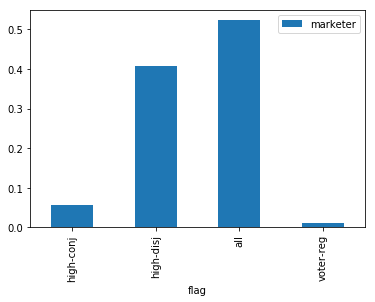

In [14]:
fig_o = r.plot(kind='bar',x='flag',y=['marketer']).get_figure()


In [15]:
writer = pd.ExcelWriter('out-116kpatients-phase-1.xlsx',engine='xlsxwriter')
r.to_excel(writer,'phase-1')
writer.save()

In [19]:
dfs


,feature,fi,fo
0,race,1,1
1,ethnicity,1,1
2,birth_date,1,1
3,city,1,1
4,state,1,1
5,marital_status,1,1
6,education,1,0
7,language,0,0
8,home_owner,1,1
9,income,0,1


In [38]:
import pandas as pd
import numpy as np
names = pd.read_csv('family-history.csv').name.tolist()
path  ='/home/steve/dev/google-cloud-sdk/accounts/curation-test.json'
sql   = """
SELECT * FROM deid_risk.registered_medical_history_dec_001
"""
dfm = pd.read_gbq("SELECT * FROM deid_risk.registered_medical_history_dec_001",private_key=path,dialect='standard')

In [69]:
cols = list( set(dfm.columns.tolist()) - set(['person_id']))
r = pd.DataFrame(dfm[cols].count(),columns=['counts'])
r['attributes'] = r.index
r['rate']  = 100*(r.counts / dfm.shape[0])
r.rate.mean(),np.sqrt(r.rate.var())

(0.9343780009344719, 1.269831148073964)

In [81]:
writer = pd.ExcelWriter('/home/steve/tmp/simple.xlsx', engine='xlsxwriter')
r.to_excel(writer,sheet_name='p1')
workbook  = writer.book
worksheet = workbook.add_worksheet()
b = pd.DataFrame({"id":np.random.choice(10,30)})

In [80]:
dir(worksheet)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assemble_xml_file',
 '_button_params',
 '_calculate_spans',
 '_calculate_x_split_width',
 '_check_dimensions',
 '_comment_params',
 '_convert_date_time',
 '_convert_name_area',
 '_csv_join',
 '_encode_password',
 '_escape_attributes',
 '_escape_data',
 '_escape_url',
 '_extract_filter_tokens',
 '_get_palette_color',
 '_get_range_data',
 '_initialize',
 '_isinf',
 '_isnan',
 '_opt_close',
 '_opt_reopen',
 '_parse_filter_expression',
 '_parse_filter_tokens',
 '_position_object_emus',
 '_position_object_pixels',
 '_prepare_chart',
 '_prepare_header_image',
 '_prepare_header_vml_objects',
 '_prepare_image',
 '_prepare_shape',
 '_prepare_tables',
 '_prepare_vml_objects',
 '_set_filehandle',
 '_set_icon_props',
 '_set_spark